<a href="https://colab.research.google.com/github/ShohamWeiss/NeuralNetworkTutorials/blob/master/TensorFlow_Tutorial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Regression

In [101]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [102]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [103]:
import tensorflow as tf

from tensorflow import  keras
from tensorflow.keras import  layers

print(tf.__version__)

2.2.0


In [104]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Auto MPG dataset
***

In [105]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [106]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                          na_values="?", comment='\t',
                          sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Clean the data
***

In [107]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [108]:
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [109]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [110]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

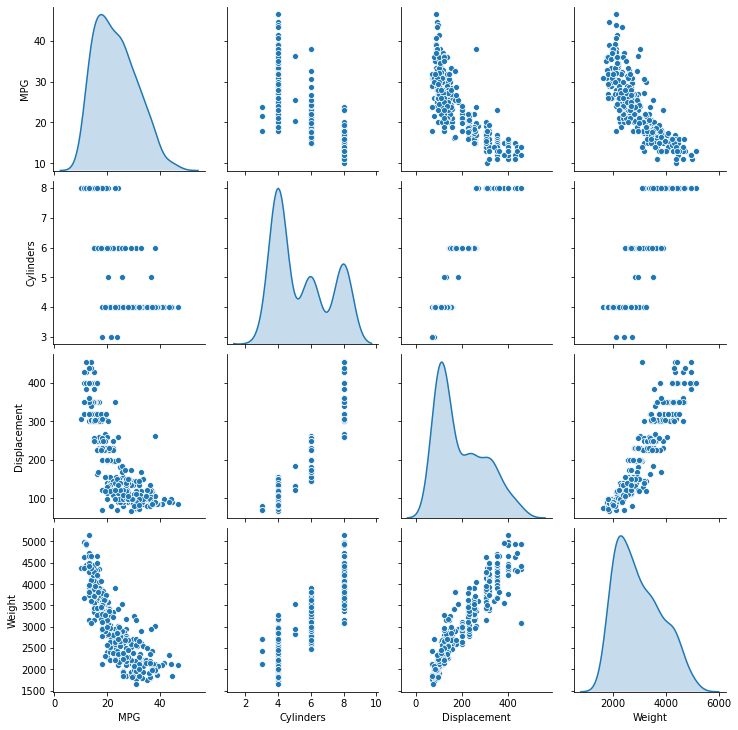

In [111]:
sns.pairplot(train_dataset[["MPG", "Cylinders","Displacement","Weight"]], diag_kind="kde")

In [112]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [113]:
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [114]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [115]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae','mse'])
  return model

In [116]:
model = build_model()

In [117]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [118]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.3288802 ],
       [-0.14139444],
       [ 0.13235629],
       [-0.5783934 ],
       [-0.15701237],
       [-0.03742446],
       [-0.16871187],
       [-0.10735796],
       [ 0.02623193],
       [-0.19280776]], dtype=float32)

In [119]:
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:568.7816,  mae:22.5305,  mse:568.7816,  val_loss:554.6464,  val_mae:22.1809,  val_mse:554.6464,  
....................................................................................................
Epoch: 100, loss:6.2075,  mae:1.7400,  mse:6.2075,  val_loss:8.2735,  val_mae:2.1820,  val_mse:8.2735,  
....................................................................................................
Epoch: 200, loss:5.3626,  mae:1.5943,  mse:5.3626,  val_loss:8.5476,  val_mae:2.2355,  val_mse:8.5476,  
....................................................................................................
Epoch: 300, loss:4.8538,  mae:1.4855,  mse:4.8538,  val_loss:8.5597,  val_mae:2.2135,  val_mse:8.5597,  
....................................................................................................
Epoch: 400, loss:4.2769,  mae:1.4013,  mse:4.2769,  val_loss:8.6647,  val_mae:2.2257,  val_mse:8.6647,  
..............................................................

In [120]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.284041,0.932286,2.284041,9.810539,2.438096,9.810539,995
996,2.241085,0.928939,2.241085,9.720709,2.424595,9.720709,996
997,2.102913,0.895906,2.102913,9.777201,2.446219,9.777201,997
998,2.290428,0.938781,2.290428,10.004316,2.481367,10.004316,998
999,2.304260,0.943819,2.304260,9.996659,2.471401,9.996659,999


In [121]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

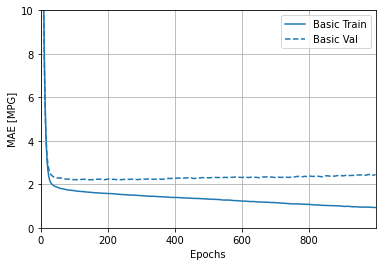

In [122]:
plotter.plot({'Basic': history}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')


Text(0, 0.5, 'MSE [MPG^2]')

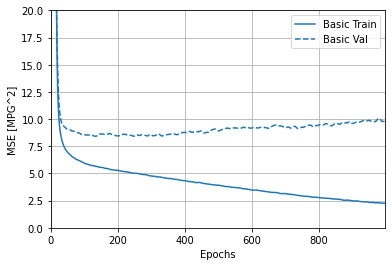

In [123]:
plotter.plot({'Basic': history}, metric="mse")
plt.ylim([0,20])
plt.ylabel('MSE [MPG^2]')

In [124]:
model = build_model()

# patience = # of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split=0.2, verbose=0,
                          callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:555.6036,  mae:22.2981,  mse:555.6036,  val_loss:539.0425,  val_mae:21.9027,  val_mse:539.0425,  
....................................................................................................

Text(0, 0.5, 'MAE [MPG]')

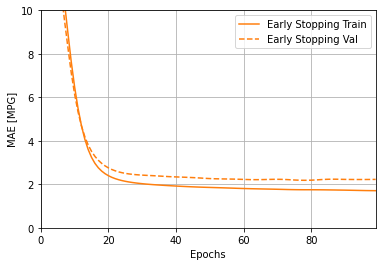

In [125]:
plotter.plot({'Early Stopping': early_history}, metric="mae")
plt.ylim([0,10])
plt.ylabel('MAE [MPG]')

In [126]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.4552 - mae: 1.7546 - mse: 5.4552
Testing set Mean Abs Error:  1.75 MPG


In [155]:
test_predictions = model.predict(normed_test_data).flatten()

# a = plt.axes(aspect='equal')
# plt.scatter(test_labels, test_predictions)
# plt.xlabel('True Vallues [MPG]')
# plt.ylabel('Predictions [MPG]')
# lims = [0,50]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims,lims)

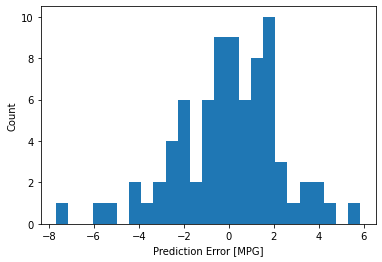

In [138]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [181]:
train_dataset.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [231]:
mazda = {'Cylinders': [4], 'Displacement': [91], 'Horsepower': [100], 'Weight': [2306], 'Acceleration': [20], 'Model Year': [14], 'Europe': 0, 'Japan': 1, 'USA': 0}
df = pd.DataFrame(mazda)
df = norm(df)
df.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,-0.869348,-0.999874,-0.127819,-0.810822,1.592111,-16.840073,-0.465148,2.012852,-1.286751


In [232]:
model.predict(df)

array([[60.704456]], dtype=float32)